In [1]:
import pandas as pd 
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import json
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances

In [2]:
df = pd.read_csv('data/spotify-2023.csv', encoding='utf-8', encoding_errors='replace')

In [3]:
export = []

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [5]:
df['in_shazam_charts'].describe()

count     903
unique    198
top         0
freq      344
Name: in_shazam_charts, dtype: object

In [6]:
pd.set_option('display.max_columns', None)
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


In [7]:
# Some columns have non numeric characters in them, need to find out why, and what they are before I convert them
#df['in_shazam_charts'] = df['in_shazam_charts'].astype(int)

all_values = ''.join(df['in_shazam_charts'].astype(str))

non_numeric_chars = set(re.findall(r'\D', all_values))

print(non_numeric_chars)

{',', 'n', 'a'}


In [8]:
df[df['in_shazam_charts'].str.contains('a', na = True)].head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
14,As It Was,Harry Styles,1,2022,3,31,23575,130,2513188493,403,198,863,46,NaN,174,F#,Minor,52,66,73,34,0,31,6
54,Another Love,Tom Odell,1,2012,10,15,18371,83,1813673666,250,122,"3,394",19,NaN,123,E,Minor,45,13,54,70,0,9,4
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,199,"3,421",20,NaN,171,C#,Major,50,38,80,0,0,9,7
71,Heat Waves,Glass Animals,1,2020,6,28,22543,63,2557975762,386,144,707,28,NaN,81,B,Major,76,53,53,44,0,9,9
73,Sweater Weather,The Neighbourhood,1,2012,5,14,16413,61,2282771485,166,87,"1,056",1,NaN,124,A#,Major,61,41,81,5,2,10,3


In [9]:
df[df['in_shazam_charts'].isnull()].head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
14,As It Was,Harry Styles,1,2022,3,31,23575,130,2513188493,403,198,863,46,NaN,174,F#,Minor,52,66,73,34,0,31,6
54,Another Love,Tom Odell,1,2012,10,15,18371,83,1813673666,250,122,"3,394",19,NaN,123,E,Minor,45,13,54,70,0,9,4
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,199,"3,421",20,NaN,171,C#,Major,50,38,80,0,0,9,7
71,Heat Waves,Glass Animals,1,2020,6,28,22543,63,2557975762,386,144,707,28,NaN,81,B,Major,76,53,53,44,0,9,9
73,Sweater Weather,The Neighbourhood,1,2012,5,14,16413,61,2282771485,166,87,"1,056",1,NaN,124,A#,Major,61,41,81,5,2,10,3


In [10]:
#In a normal analysis work, I would not do this. I would look at the distribution of the columns with missing values, look 
# to see if they are correlated  with other columns, and then would select a method to either impute them, or fill them 
# with another type of value... this is bad practice and I am fully aware... however for the scope of the assignment and
# and the time constraint that is given I will just rid the dataset of null values...
df.dropna(inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            817 non-null    object
 1   artist(s)_name        817 non-null    object
 2   artist_count          817 non-null    int64 
 3   released_year         817 non-null    int64 
 4   released_month        817 non-null    int64 
 5   released_day          817 non-null    int64 
 6   in_spotify_playlists  817 non-null    int64 
 7   in_spotify_charts     817 non-null    int64 
 8   streams               817 non-null    object
 9   in_apple_playlists    817 non-null    int64 
 10  in_apple_charts       817 non-null    int64 
 11  in_deezer_playlists   817 non-null    object
 12  in_deezer_charts      817 non-null    int64 
 13  in_shazam_charts      817 non-null    object
 14  bpm                   817 non-null    int64 
 15  key                   817 non-null    object


In [12]:
#need to replace shazam, deezer, streams with correct data value 

df['in_shazam_charts'] = df['in_shazam_charts'].str.replace(',', '').astype(int)
df['in_shazam_charts'] = df['in_shazam_charts'].astype(int)


In [13]:

df['in_deezer_playlists'] = df['in_deezer_playlists'].str.replace(',', '').astype(int)
df['in_deezer_playlists'] = df['in_deezer_playlists'].astype(int)


In [14]:
df['streams'].unique()

array(['141381703', '133716286', '140003974', '800840817', '303236322',
       '183706234', '725980112', '58149378', '95217315', '553634067',
       '505671438', '58255150', '387570742', '1163093654', '496795686',
       '335222234', '363369738', '86444842', '52135248', '200647221',
       '115364561', '78300654', '899183384', '61245289', '429829812',
       '127408954', '22581161', '52294266', '843957510', '999748277',
       '618990393', '188933502', '1355959075', '786181836', '176553476',
       '354495408', '2808096550', '1109433169', '1047101291', '570515054',
       '1647990401', '2565529693', '518745108', '107753850', '177740666',
       '153372011', '57876440', '256483385', '1214083358', '111947664',
       '156338624', '720434240', '357925728', '674072710', '1755214421',
       '404562836', '373199958', '14780425', '39578178', '54266102',
       '751134527', '1356565093', '1592909789', '635412045', '1230675890',
       '585695368', '43857627', '2009094673', '600976848', '39709

In [15]:
idx = df[df['streams'] == 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3'].index[0]

df.drop(index=idx, inplace = True)

In [16]:

df['streams'] = df['streams'].str.replace(',', '').astype('int64')
df['streams'] = df['streams'].astype('int64')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            816 non-null    object
 1   artist(s)_name        816 non-null    object
 2   artist_count          816 non-null    int64 
 3   released_year         816 non-null    int64 
 4   released_month        816 non-null    int64 
 5   released_day          816 non-null    int64 
 6   in_spotify_playlists  816 non-null    int64 
 7   in_spotify_charts     816 non-null    int64 
 8   streams               816 non-null    int64 
 9   in_apple_playlists    816 non-null    int64 
 10  in_apple_charts       816 non-null    int64 
 11  in_deezer_playlists   816 non-null    int64 
 12  in_deezer_charts      816 non-null    int64 
 13  in_shazam_charts      816 non-null    int64 
 14  bpm                   816 non-null    int64 
 15  key                   816 non-null    object


In [18]:
df.head(30)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,213,88,17,946,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,222,43,13,418,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,89,30,13,194,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,210,48,11,953,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,110,66,13,339,170,D,Minor,81,56,48,21,0,8,33


In [19]:
# corr_matr = df.corr()
# plt.figure(figsize=(12, 10))

# sns.heatmap(corr_matr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# plt.title('Correlation Heatmap All Features')

# plt.show()


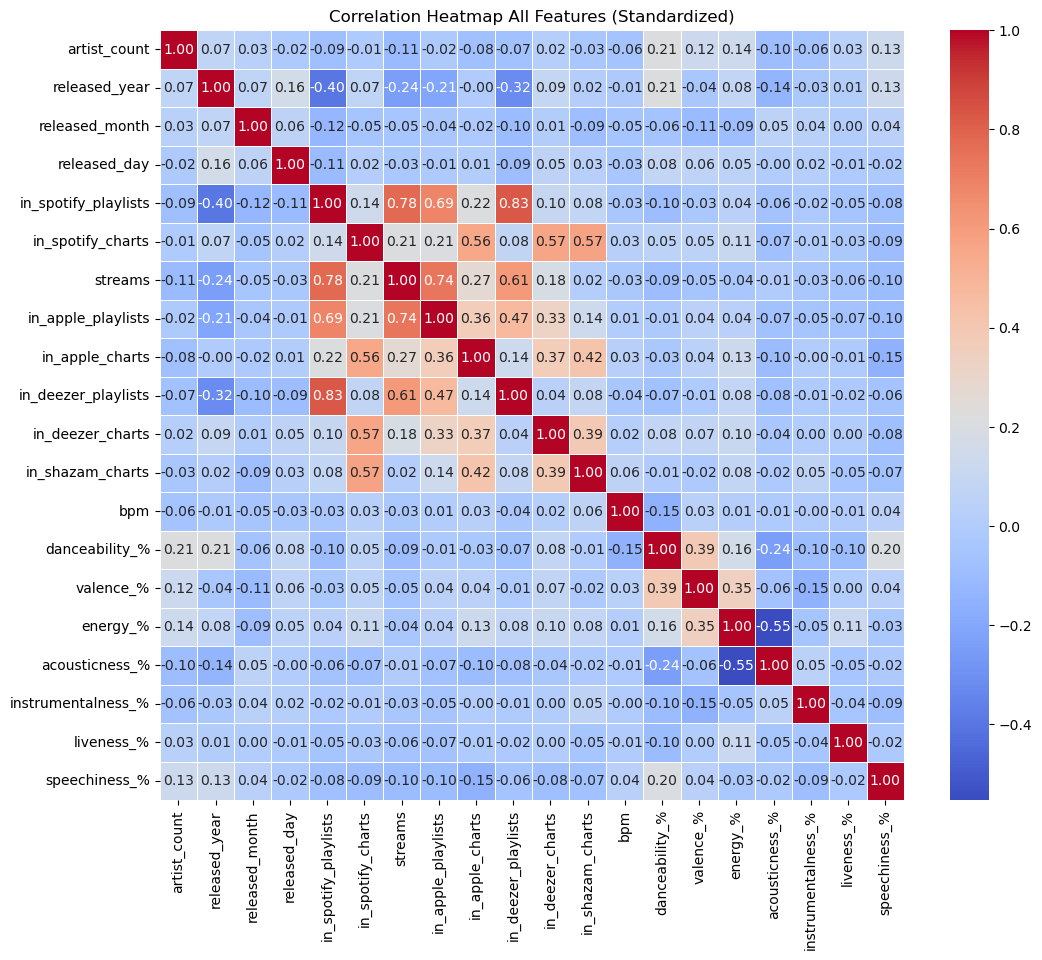

In [20]:
numeric_df = df.select_dtypes(include=['number'])

scaler = StandardScaler()
standard_data = scaler.fit_transform(numeric_df)

standard_df = pd.DataFrame(standard_data, columns=numeric_df.columns)

plt.figure(figsize=(12, 10))

corr_matr = standard_df.corr()

sns.heatmap(corr_matr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Heatmap All Features (Standardized)')

plt.show()


In [21]:
#Chose 8 variables 
#streams, in_spotify_playlists, in_apple_playlists, in_deezer_playlists, danceability_%, valence_%, energy_%, acousticness_%



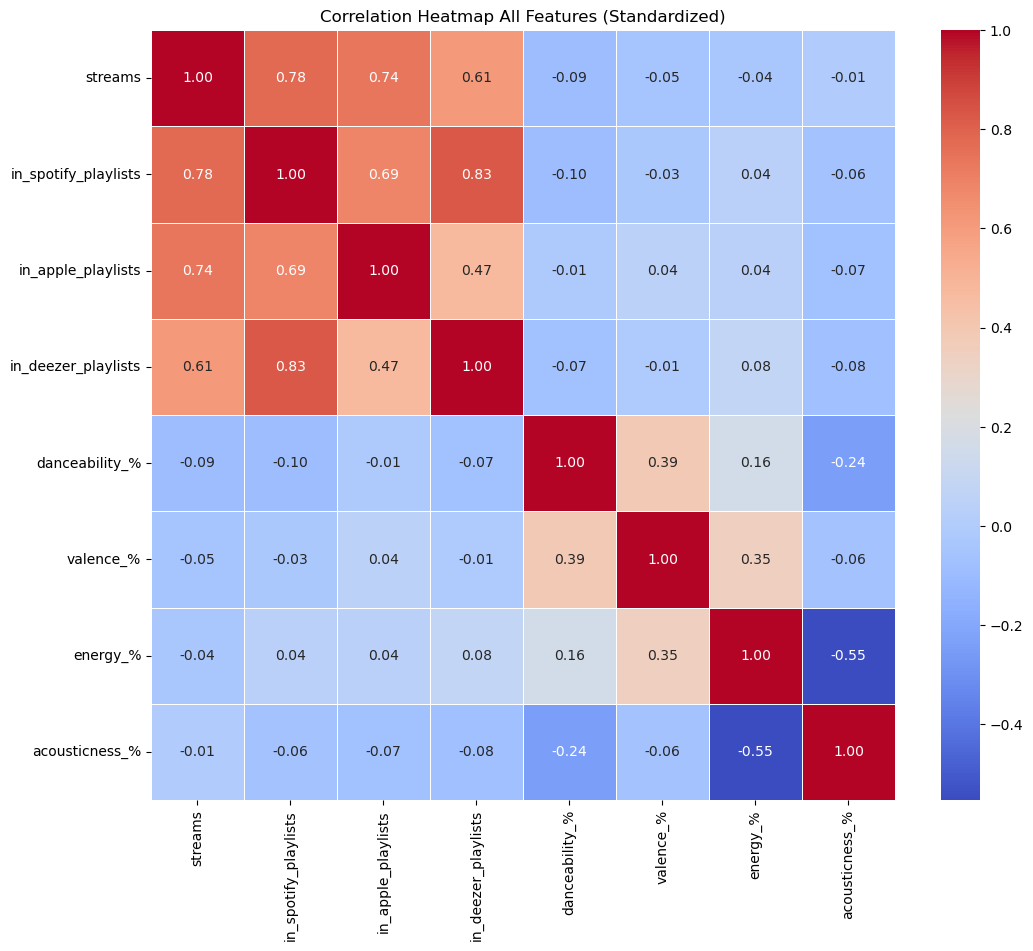

In [22]:
numeric_df = df.select_dtypes(include=['number'])

numeric_df = numeric_df[['streams', 'in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%']]

scaler = StandardScaler()
standard_data = scaler.fit_transform(numeric_df)

standard_df = pd.DataFrame(standard_data, columns=numeric_df.columns)

plt.figure(figsize=(12, 10))

corr_matr = standard_df.corr()

sns.heatmap(corr_matr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Heatmap All Features (Standardized)')

plt.show()

In [23]:
#Saving in variable to export to csv later on
export.append(corr_matr.copy(deep= True))

In [24]:
#in_deezer and in spotify ... in_spotify is A1

#Generation of Axes based on chain greatest correlations 

A1 = 'in_spotify_playlists'
A2 = 'in_deezer_playlists'
A3 = 'streams'
A4 = 'in_apple_playlists'
A5 = 'acousticness_%'
A6 = 'energy_%'
A7 = 'valence_%'
A8 = 'danceability_%'
C1 = 'key'
C2 = 'released_month'

In [25]:
#Now make scatterplots

in_spotify_playlists     int64
in_deezer_playlists      int64
streams                  int64
in_apple_playlists       int64
acousticness_%           int64
key                     object
released_month           int64
dtype: object


/Users/saatvik/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


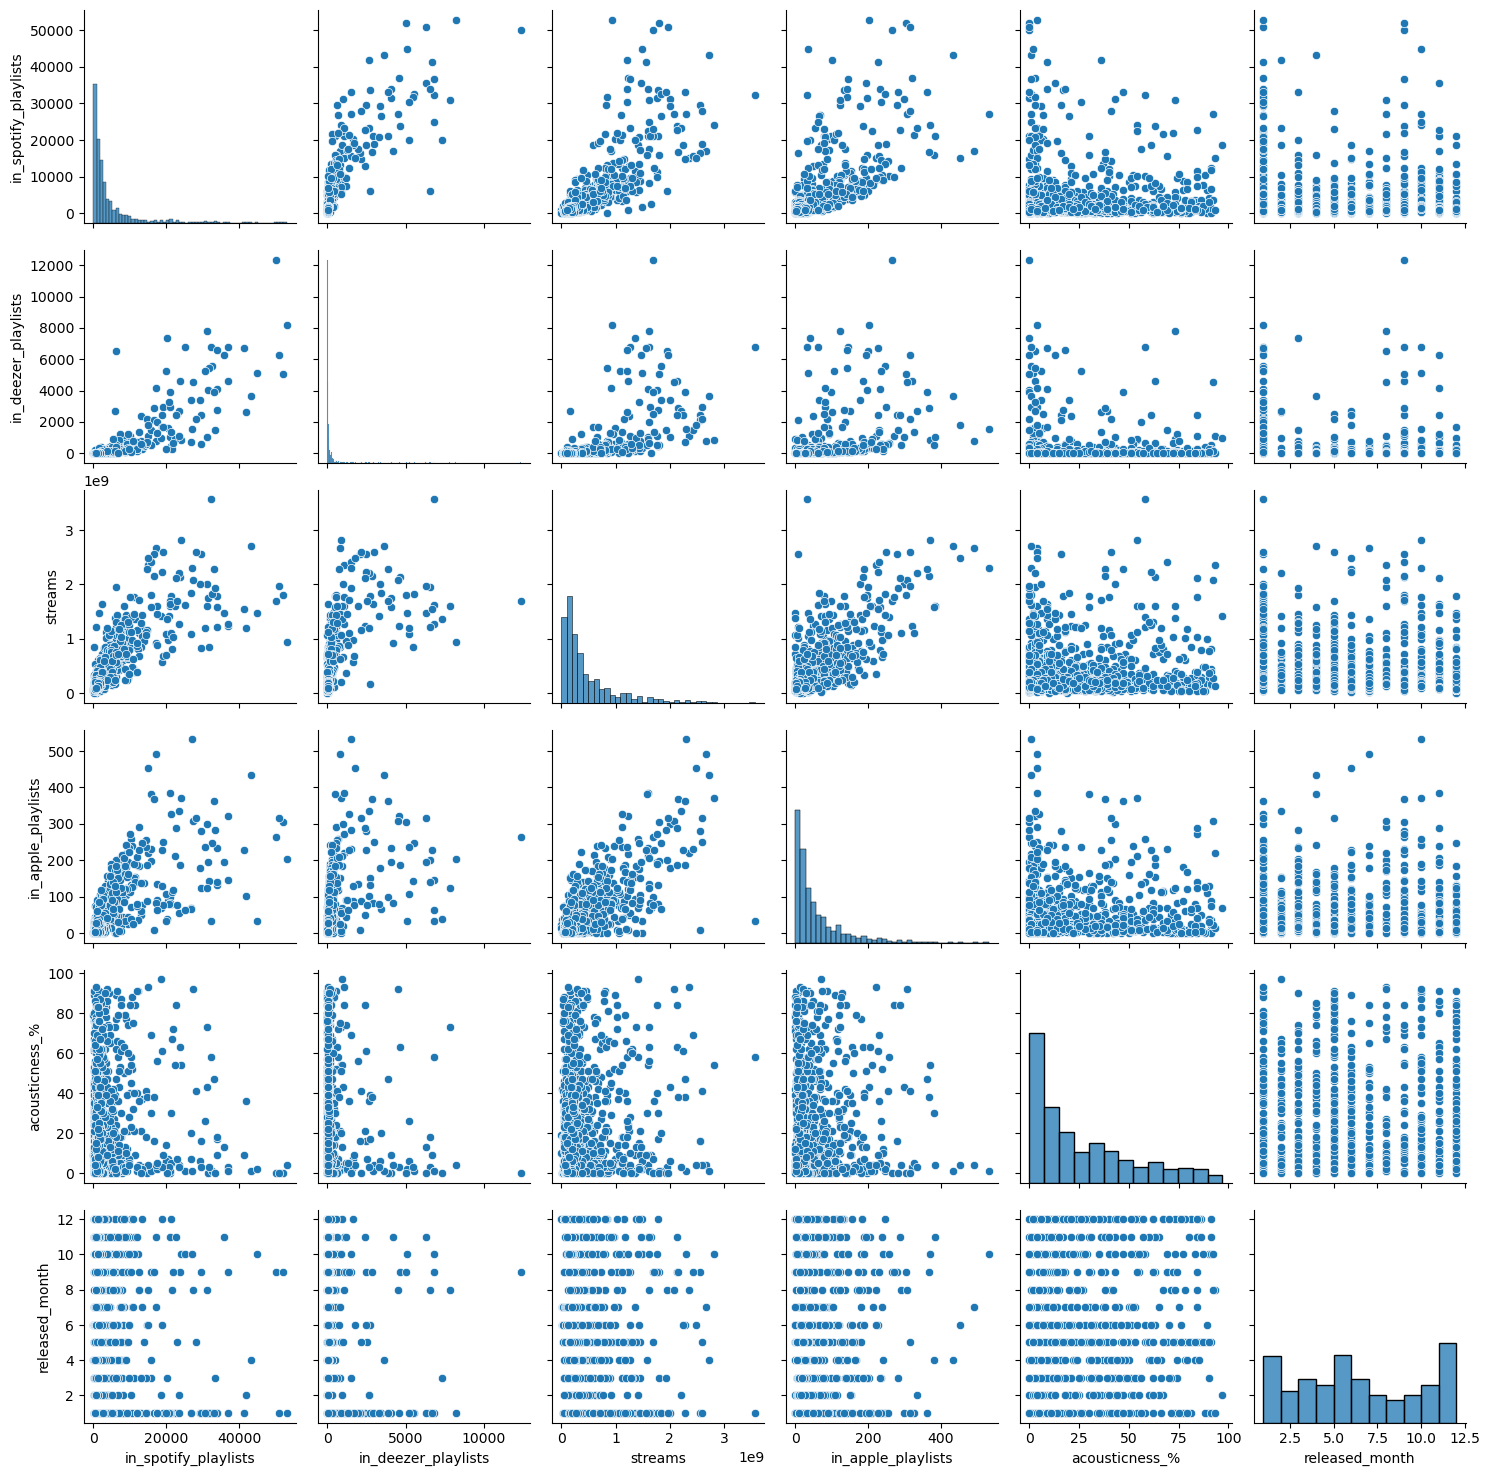

In [26]:
A_cols = [A1, A2, A3, A4, A5, A6, A7, A8, C1, C2]
A_cols_scatt = [A1, A2, A3, A4, A5, C1, C2]

#A_cols_scatt = [A1, A2, A3, A4, A5]


df_scatter = df[A_cols_scatt]

print(df_scatter.dtypes)

sns.pairplot(df_scatter)
plt.show()

In [27]:
export.append(df_scatter.copy(deep=True))

In [28]:
df_scatter

,in_spotify_playlists,in_deezer_playlists,streams,in_apple_playlists,acousticness_%,key,released_month
0,553,45,141381703,43,31,B,7
1,1474,58,133716286,48,7,C#,3
2,1397,91,140003974,94,17,F,6
3,7858,125,800840817,116,11,A,8
4,3133,87,303236322,84,14,A,5
...,...,...,...,...,...,...,...
948,953,37,91473363,61,57,A,11
949,1180,8,121871870,4,83,F#,10
950,573,7,73513683,2,4,C#,11
951,1320,17,133895612,29,8,C#,10


In [29]:
from pandas.plotting import parallel_coordinates

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            816 non-null    object
 1   artist(s)_name        816 non-null    object
 2   artist_count          816 non-null    int64 
 3   released_year         816 non-null    int64 
 4   released_month        816 non-null    int64 
 5   released_day          816 non-null    int64 
 6   in_spotify_playlists  816 non-null    int64 
 7   in_spotify_charts     816 non-null    int64 
 8   streams               816 non-null    int64 
 9   in_apple_playlists    816 non-null    int64 
 10  in_apple_charts       816 non-null    int64 
 11  in_deezer_playlists   816 non-null    int64 
 12  in_deezer_charts      816 non-null    int64 
 13  in_shazam_charts      816 non-null    int64 
 14  bpm                   816 non-null    int64 
 15  key                   816 non-null    object


/var/folders/rh/bp1_zwxj76z6nrtwmrl525600000gn/T/ipykernel_75947/3983208968.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_parallel['Class'] = 'Bruh'


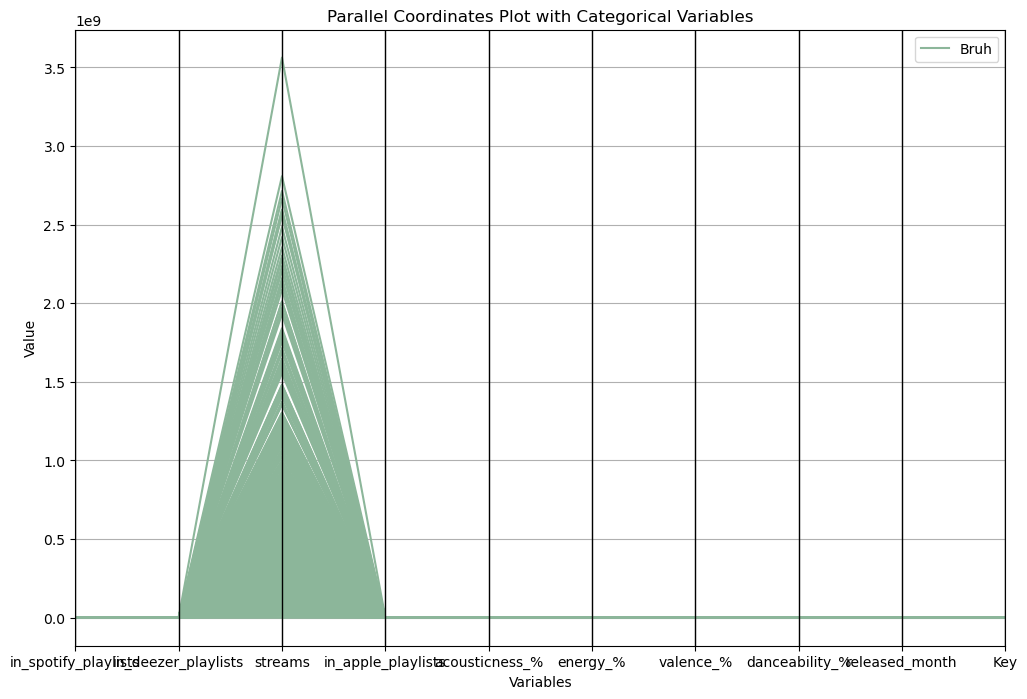

In [30]:
df_parallel = df[A_cols].copy()  

print(df.info())

# df_encoded = pd.get_dummies(df, columns=[C1], prefix='Cat')

# encoded_A_cols = A_cols + [col for col in df_encoded.columns if col.startswith('Cat_')]
# encoded_A_cols.remove('key')
# print(encoded_A_cols)
# df_parallel = df_encoded[encoded_A_cols]

label_encoder = LabelEncoder()

df['Key'] = label_encoder.fit_transform(df[C2])

A_cols_parallel = [A1, A2, A3, A4, A5, A6, A7, A8, C2]

print(A_cols_parallel)

df_parallel = df[A_cols_parallel + ['Key']]

print(df_parallel.info())

plt.figure(figsize=(12, 8))
df_parallel['Class'] = 'Bruh'
parallel_coordinates(df_parallel, class_column='Class') 
plt.title('Parallel Coordinates Plot with Categorical Variables')
plt.xlabel('Variables')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [31]:
export.append(df_parallel.copy(deep=True))

In [32]:
print(A_cols)

['in_spotify_playlists', 'in_deezer_playlists', 'streams', 'in_apple_playlists', 'acousticness_%', 'energy_%', 'valence_%', 'danceability_%', 'key', 'released_month']


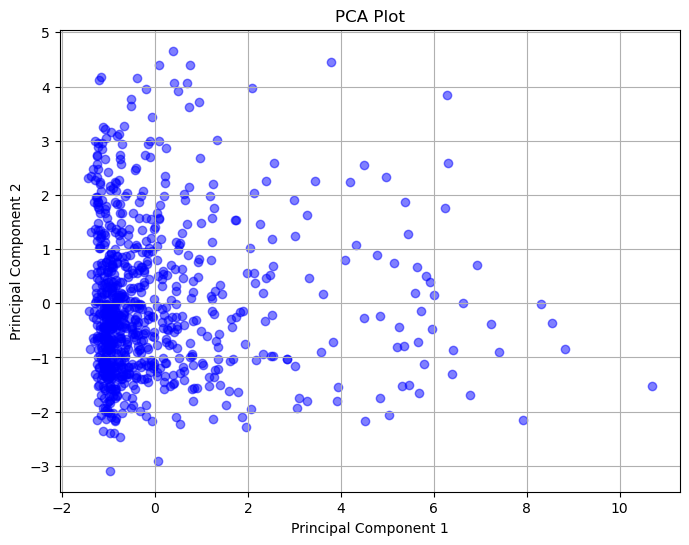

In [33]:
C1_encoded = 'Key'

#A_cols_updated = A_cols_parallel + [C1_encoded]

A_cols_AO = [A1, A2, A3, A4, A5, A6, A7, A8]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[A_cols_AO])

pca = PCA(n_components=2) 
pca_components = pca.fit_transform(df_scaled)

pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], color='blue', alpha=0.5)
plt.title('PCA Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

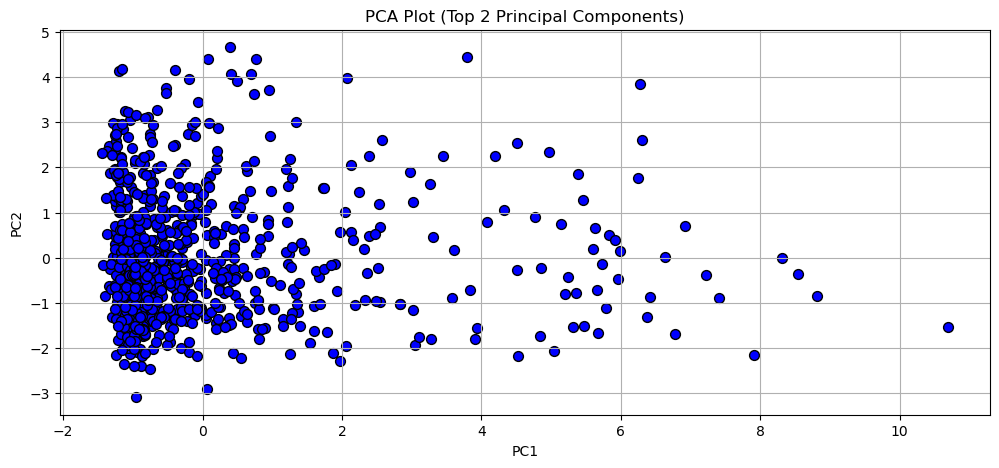

In [34]:
pca = PCA()
pca.fit(df_scaled)

pca_2d = pca.transform(df_scaled)[:, :2]



plt.figure(figsize=(12, 5))
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c='blue', edgecolor='k', s=50)
plt.title('PCA Plot (Top 2 Principal Components)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)

plt.show()

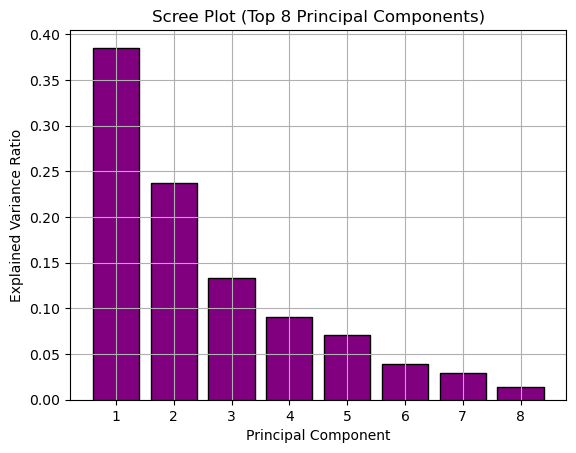

In [35]:
explained_variance = pca.explained_variance_ratio_

plt.bar(np.arange(1, 9), explained_variance[:8], color='purple', edgecolor='k')
plt.title('Scree Plot (Top 8 Principal Components)')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)

plt.show()

In [36]:
print(explained_variance)


[0.3853714  0.23724545 0.13279601 0.09073932 0.071399   0.03950546
 0.0287774  0.01416596]


In [37]:
export.append(explained_variance)

In [38]:
#X axis... PC1
export.append(pca_2d[:, 0])

#Y axis... PC2
export.append(pca_2d[:, 1])

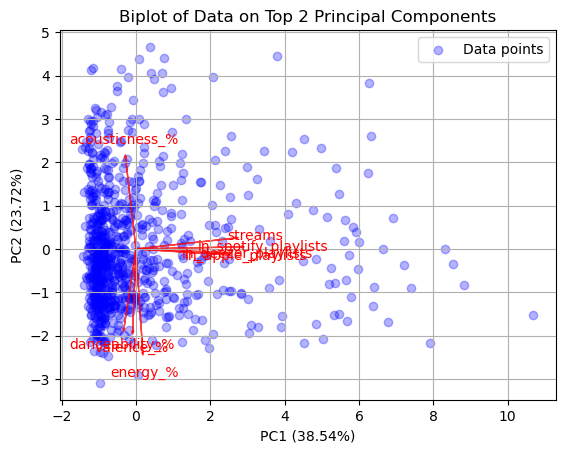

In [39]:
load_vector_dict = {}
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], color='blue', alpha=0.3, label='Data points')

loadings = pca.components_.T * np.sqrt(pca.explained_variance_) * 3

for i, feature in enumerate(A_cols_AO):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='r', alpha=0.75, head_width=0.05)
    plt.text(loadings[i, 0] * 1.2, loadings[i, 1] * 1.2, feature, color='r', ha='center', va='center')
    load_vector_dict[feature] = [loadings[i, 0] * 1.2, loadings[i, 1] * 1.2]

plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
plt.title("Biplot of Data on Top 2 Principal Components")
plt.grid(True)

plt.legend()
plt.show()


In [40]:
print(load_vector_dict)

{'in_spotify_playlists': [3.409214451737354, 0.0585618589198147], 'in_deezer_playlists': [2.999465653348058, -0.10428530290809816], 'streams': [3.2162452762715943, 0.3033280653576789], 'in_apple_playlists': [2.9527845940474102, -0.16355597386267634], 'acousticness_%': [-0.3352156951110109, 2.5221780253952004], 'energy_%': [0.21929339382931337, -2.8516836125109153], 'valence_%': [-0.10530186456654629, -2.2723597790706958], 'danceability_%': [-0.387396705252883, -2.199460282512847]}


In [41]:
export.append(load_vector_dict)

/Users/saatvik/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


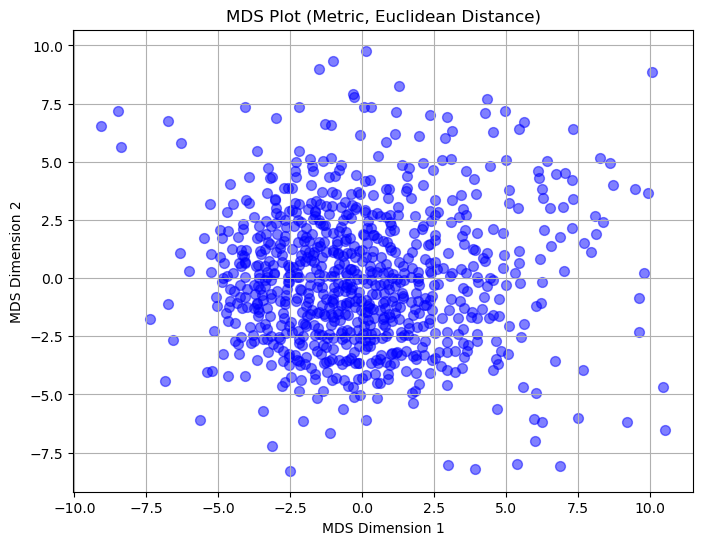

In [42]:
numeric_df = df.select_dtypes(include=['number'])

scaler = StandardScaler()
df_scaled = scaler.fit_transform(numeric_df)

distance_matrix = pairwise_distances(df_scaled, metric='euclidean')

mds = MDS(n_components=2, dissimilarity='precomputed', random_state=30)
mds_result = mds.fit_transform(distance_matrix)

plt.figure(figsize=(8, 6))
plt.scatter(mds_result[:, 0], mds_result[:, 1], color='blue', s=50, alpha=0.5)

plt.title("MDS Plot (Metric, Euclidean Distance)")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.grid(True)
plt.show()


/Users/saatvik/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


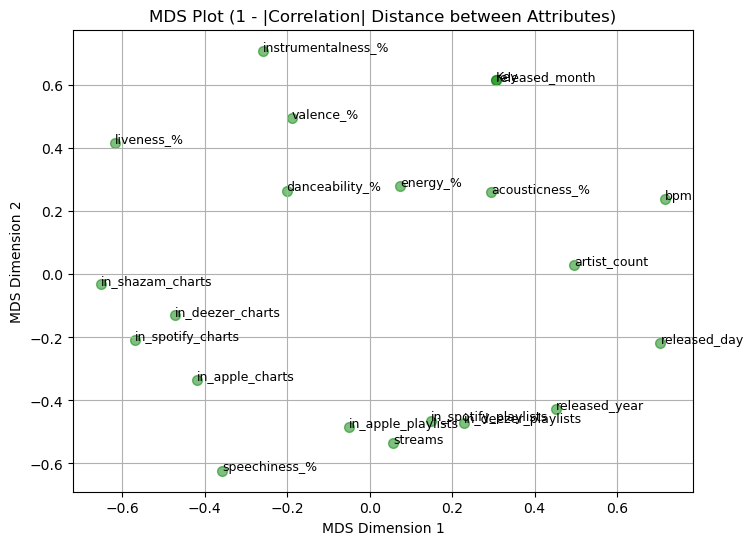

In [43]:
mds_attr_dict = {}
correlation_matrix = numeric_df.corr().abs()
dissimilarity_matrix = 1 - correlation_matrix

mds_attributes = MDS(n_components=2, dissimilarity='precomputed', random_state=30)
mds_attributes_result = mds_attributes.fit_transform(dissimilarity_matrix)

plt.figure(figsize=(8, 6))
plt.scatter(mds_attributes_result[:, 0], mds_attributes_result[:, 1], color='green', s=50, alpha=0.5)

for i, feature_name in enumerate(numeric_df.columns):
    plt.text(mds_attributes_result[i, 0], mds_attributes_result[i, 1], feature_name, fontsize=9)
    mds_attr_dict[feature_name] = [mds_attributes_result[i, 0], mds_attributes_result[i, 1]]

plt.title("MDS Plot (1 - |Correlation| Distance between Attributes)")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.grid(True)
plt.show()


In [44]:
#data
#mds dim 1 
export.append(mds_result[:, 0])

#mds dim 2
export.append(mds_result[:, 1])

#attributes
#mds dim 1
export.append(mds_attributes_result[:, 0])

#mds dim2
export.append(mds_attributes_result[:, 1])

#attribute dictionary
export.append(mds_attr_dict)

In [45]:
print(export)

[                       streams  in_spotify_playlists  in_apple_playlists  \
streams               1.000000              0.780404            0.735321   
in_spotify_playlists  0.780404              1.000000            0.688306   
in_apple_playlists    0.735321              0.688306            1.000000   
in_deezer_playlists   0.610812              0.829629            0.468576   
danceability_%       -0.093268             -0.097348           -0.013306   
valence_%            -0.051014             -0.029527            0.042017   
energy_%             -0.036499              0.035968            0.040211   
acousticness_%       -0.005751             -0.064896           -0.071554   

                      in_deezer_playlists  danceability_%  valence_%  \
streams                          0.610812       -0.093268  -0.051014   
in_spotify_playlists             0.829629       -0.097348  -0.029527   
in_apple_playlists               0.468576       -0.013306   0.042017   
in_deezer_playlists       

In [46]:
for item in export:
    print(type(item))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'dict'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'dict'>


In [47]:
# export_name = ['corr_df', 'scatter_df', 'parallel_df', 'scree_exp_var', 'X_PC1', 'Y_PC2', 'bi_plot_vector_dict', 
#                'data_mds_x_dim1', 'data_mds_y_dim2', 'attr_mds_x_dim1', 'attr_mds_y_dim2', 'attr_mds_dict']

# for idx, item in enumerate(export):
#     if isinstance(item, pd.DataFrame):
#         json_export = item.to_json(orient='records')
        
#         with open('data/' + export_name[idx] + '.json', 'w') as f:
#             f.write(json_export)
            
#     elif isinstance(item, np.ndarray):
#         json_export_arr = item.tolist()
        
#         with open('data/' + export_name[idx] + '.json', 'w') as f:
#             json.dump(json_export_arr, f)
            
#     elif isinstance(item, dict):
#         json_export_dict = json.dumps(item)
        
#         with open('data/' + export_name[idx] + '.json', 'w') as f:
#             f.write(json_export_dict)
        
        
        
        

### jsonify csv data and make it a file 

In [48]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,Key
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4,6
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4,2
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6,5
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15,7
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6,4


In [49]:
chart_selector_data = df.to_dict(orient='records')

In [50]:
df.to_json('data/chart_selector_data.json', orient='records', indent=4)